In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import more libraries


## Splitting the dataset

from sklearn.model_selection import train_test_split

## Model to use

## Logistic Regression

from sklearn.linear_model import LogisticRegression

## Decision Trees

from sklearn.tree import DecisionTreeClassifier

## Random Forest

from sklearn.ensemble import RandomForestClassifier

## Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier


##Assessing the models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Trees
from sklearn.tree import plot_tree


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [ ]:
# opena dataframe
df = pd.read_excel('wine.xlsx')
# assess info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       178 non-null    int64  
 1   X1      178 non-null    float64
 2   X2      178 non-null    float64
 3   X3      178 non-null    float64
 4   X4      178 non-null    float64
 5   X5      178 non-null    int64  
 6   X6      178 non-null    float64
 7   X7      178 non-null    float64
 8   X8      178 non-null    float64
 9   X9      178 non-null    float64
 10  X10     178 non-null    float64
 11  X11     178 non-null    float64
 12  X12     178 non-null    float64
 13  X13     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
#see the df

df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The variable to be predicted is **Y**, that denoted the class of the wine; there are thre classes: "1", "2", "3".

For proper information and for the sake of a better comprehension, I want to underline that I will use as synonims the term "Wine Class" and "Grape variety".
Since there are no clear explanations in the source material regarding the target variable, I will use the two terms above interchangeably, even though, probably there should be some differences from the perspective of a winery specialist.

The other 13 variables, actually, are features of the wine chemically measured.
Excluding 'X5'= Magnesium and 'X13'= Proline, that present integer values, all the other indipendent variables are continuous.

In [ ]:
# assess the values of target variable
df['Y'].value_counts()

,count
Y,
2,71
1,59
3,48


There aren't big differences between the counts of each one of the three classes in the dataset, therefore no relevant unbalancements are noticeable.

It is possible to proceed in the analysis without further adjustments.

Let's check correlations

<Axes: >

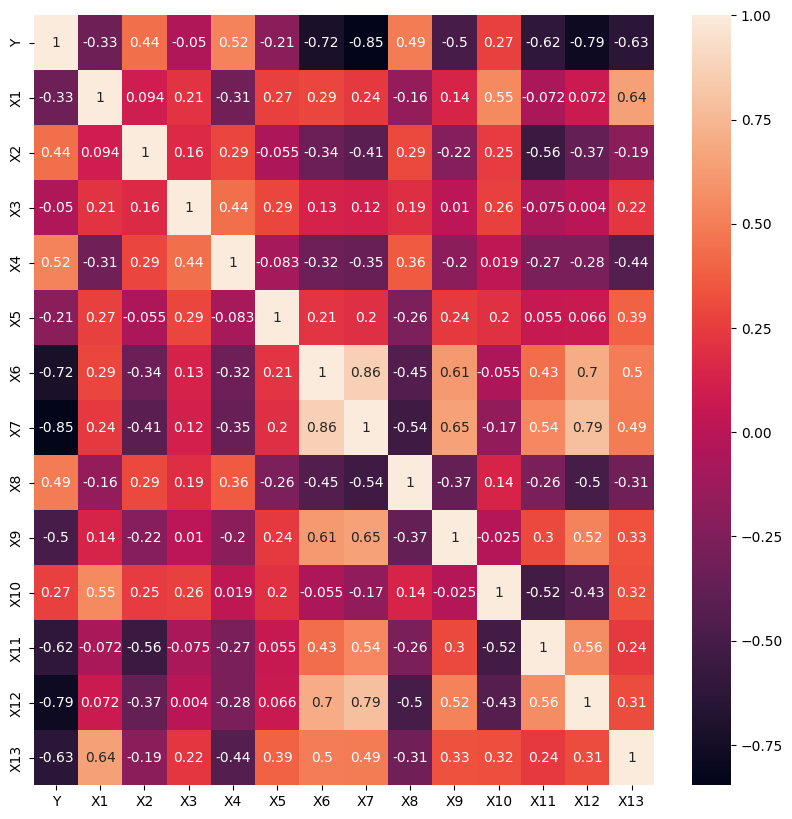

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(3), annot=True)

13 variables + the target make this correlation graph difficult to be understood; i will create a ordered rank of the indipendent variables with the highest absolute value of correlations.

In [ ]:
# Calculate the absolute correlation with the target variable 'Y'
correlation_with_target = df.corr()['Y'].abs().sort_values(ascending=False)

# Remove the target variable itself from the ranking
correlation_with_target = correlation_with_target.drop('Y')

# Print the ranked variables
print(correlation_with_target)

X7     0.847498
X12    0.788230
X6     0.719163
X13    0.633717
X11    0.617369
X4     0.517859
X9     0.499130
X8     0.489109
X2     0.437776
X1     0.328222
X10    0.265668
X5     0.209179
X3     0.049643
Name: Y, dtype: float64


Correlation can not be considered causalitites but it is a good start to understand any strong conncetion.

So, I will pick the top 3 of them, that are all negative correlations plus the 'X4' which has the highest positive correlation.

The selected variables are:

* 'X7'= Flavanoids $\to$ Correlation =$\sim -0.85$
* 'X12'= OD280/OD315 of diluted wines $\to$ Correlation =$\sim -0.79$
* 'X6'= Total phenols $\to$ Correlation =$\sim -0.72$
* 'X4'= Alcalinity of ash $\to$ Correlation =$\sim 0.52$

Let's create a subset of the original df

In [ ]:
subset = df[['X7', 'X12', 'X6', 'X4', 'Y']]
subset.head()

,X7,X12,X6,X4,Y
0,3.06,3.92,2.80,15.6,1
1,2.76,3.40,2.65,11.2,1
2,3.24,3.17,2.80,18.6,1
3,3.49,3.45,3.85,16.8,1
4,2.69,2.93,2.80,21.0,1


In [ ]:
# renamed the columns

subset.columns = ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols', 'Alcalinity of ash', 'Y']

subset.head()

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash,Y
0,3.06,3.92,2.80,15.6,1
1,2.76,3.40,2.65,11.2,1
2,3.24,3.17,2.80,18.6,1
3,3.49,3.45,3.85,16.8,1
4,2.69,2.93,2.80,21.0,1


Let's see how these selected variables spread between survivors the three classes of wine.

<ipython-input-12-f89bf42494c6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='Flavanoids', data=subset, ax=axes[0], palette="Set2")
<ipython-input-12-f89bf42494c6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='OD280/OD315 of diluted wines', data=subset, ax=axes[1], palette="Set2")
<ipython-input-12-f89bf42494c6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Y', y='Total phenols', data=subset, ax=axes[2], palette="Set2")
<ipython-input-12-f89bf42494c6>:22: FutureWarning: 

Passing `palette` without assigning 

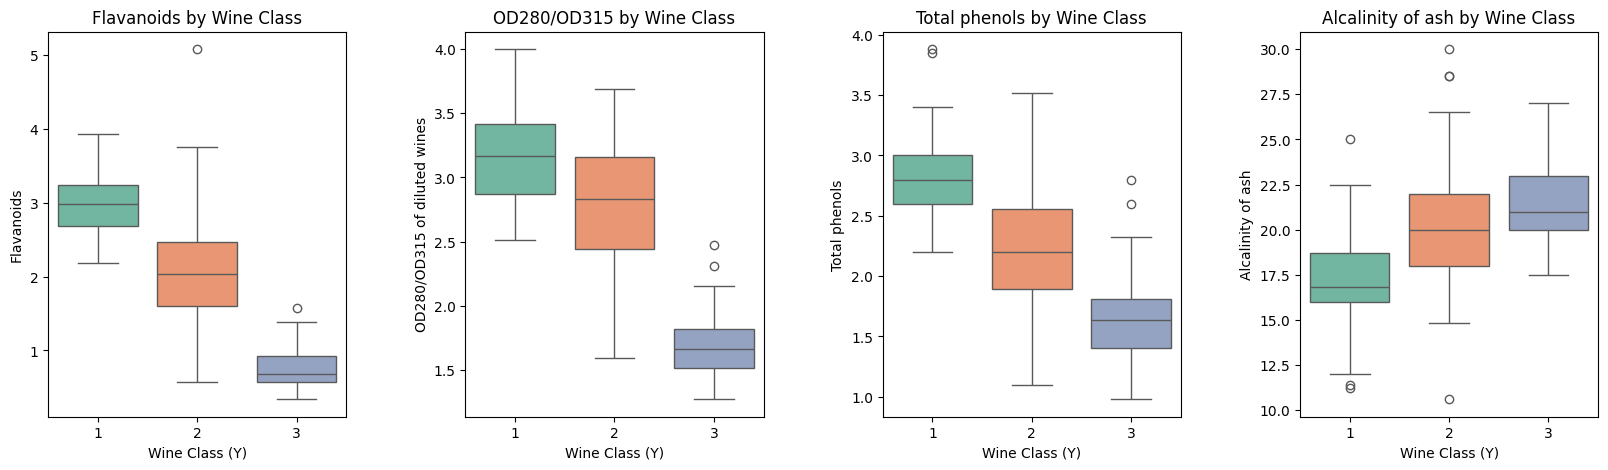

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.subplots_adjust(wspace=0.4)

sns.boxplot(x='Y', y='Flavanoids', data=subset, ax=axes[0], palette="Set2")
axes[0].set_title('Flavanoids by wine class')
axes[0].set_xlabel('Wine Class (Y)')
axes[0].set_ylabel('Flavanoids')
axes[0].tick_params(axis='x')

sns.boxplot(x='Y', y='OD280/OD315 of diluted wines', data=subset, ax=axes[1], palette="Set2")
axes[1].set_title('OD280/OD315 by Wine Class')
axes[1].set_xlabel('Wine Class (Y)')
axes[1].set_ylabel('OD280/OD315 of diluted wines')
axes[1].tick_params(axis='x')

sns.boxplot(x='Y', y='Total phenols', data=subset, ax=axes[2], palette="Set2")
axes[2].set_title('Total phenols by Wine Class')
axes[2].set_xlabel('Wine Class (Y)')
axes[2].set_ylabel('Total phenols')
axes[2].tick_params(axis='x')

sns.boxplot(x='Y', y='Alcalinity of ash', data=subset, ax=axes[3], palette="Set2")
axes[3].set_title('Alcalinity of ash by Wine Class')
axes[3].set_xlabel('Wine Class (Y)')
axes[3].set_ylabel('Alcalinity of ash')
axes[3].tick_params(axis='x')



For two variables, "Flavanoids" and "Total phenols" there is almost no overlapping, with the which is a good sign later for the model to better classify.

On the other hand, the other two variables show relevant overlapping, but analyzing all four together can lead to good performances of the model as well.

Let's better see distinctiveness and overlapping in a scatter chart and let's start using wine-related colours.

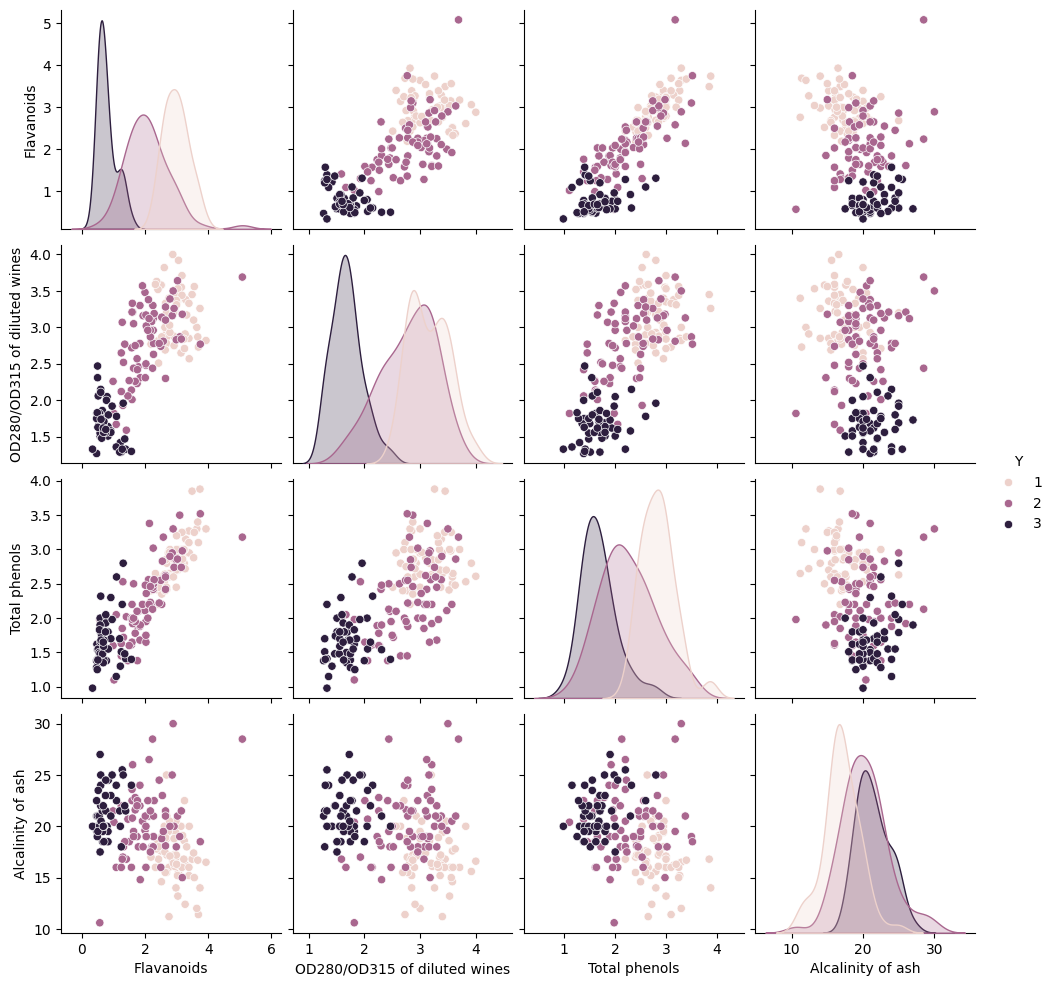

In [ ]:
sns.pairplot(subset, hue='Y')

These scatter plots confirm the comments above, with Flavanoids, and Total phenols which show good separation between the three wine classes (represented by wine-related colors). This suggests that these variables are important for distinguishing between the classes.

OD280/OD315 of diluted wines shows some slight overlapping while Alcalinity of ash seems to have less power in separating the classes compared to the other three variables, as there is more overlap between the classes in the scatter plots involving it.

With both scatterplots and boxplots, it is also possible to identify several outliers which are points that lie far away from the main cluster of data. These outliers could be worth investigating further to see if they are data entry errors or represent unusual samples.

## Let's fit the model

In [ ]:
## independent variables, feature matrix

X = subset[['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols','Alcalinity of ash']]

### The predicted variable

y = subset['Y']

### Split the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 236)

In [ ]:
# model fitting

#logistic regression
model_LR= LogisticRegression()
model_LR.fit(X_train, y_train)

#decision three
model_DT= DecisionTreeClassifier(max_depth=3, random_state=2) #max depth fix the deepen of the three - 4 is quite e big number
model_DT.fit(X_train, y_train)

#random forest
model_RF= RandomForestClassifier(max_depth=3, random_state=2)
model_RF.fit(X_train, y_train)

#gradient boost
model_GB= GradientBoostingClassifier(max_depth=3, random_state=2)
model_GB.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=2)

In [ ]:
### Calculation of predictions according to the model for train data and test data

y_train_model_LR = model_LR.predict(X_train)
y_test_model_LR = model_LR.predict(X_test)

y_train_model_DT = model_DT.predict(X_train)
y_test_model_DT = model_DT.predict(X_test)

y_train_model_RF = model_RF.predict(X_train)
y_test_model_RF = model_RF.predict(X_test)

y_train_model_GB = model_GB.predict(X_train)
y_test_model_GB = model_GB.predict(X_test)


In [ ]:
### Proportion of correct predictions in the train data

print('Accuracy of predictions in the train data:')
print(f'Logistic Regression {accuracy_score(y_train, y_train_model_LR):.3f}')
print(f'Decision Tree {accuracy_score(y_train, y_train_model_DT):.3f}')
print(f'Random Forest {accuracy_score(y_train, y_train_model_RF):.3f}')
print(f'Gradient Boosting {accuracy_score(y_train, y_train_model_GB):.3f}')

Accuracy of predictions in the train data:
Logistic Regression 0.895
Decision Tree 0.925
Random Forest 0.917
Gradient Boosting 1.000


In [ ]:
### Proportion of correct predictions in the test data

print('Accuracy of predictions in the test data:')
print(f'Logistic Regression {accuracy_score(y_test, y_test_model_LR):.3f}')
print(f'Decision Tree {accuracy_score(y_test, y_test_model_DT):.3f}')
print(f'Random Forest {accuracy_score(y_test, y_test_model_RF):.3f}')
print(f'Gradient Boosting {accuracy_score(y_test, y_test_model_GB):.3f}')

Accuracy of predictions in the test data:
Logistic Regression 0.867
Decision Tree 0.822
Random Forest 0.778
Gradient Boosting 0.756


All the models applied are quite good both in the training and test data, with a peak performance with the gradient boosting in the training. Unfortunately, that incredible accuracy shows a little bit of overfitting of the model when compared with the test data 0.756, but still a good value.

## Decision Three model

Now let's plot the figure regarding the Decision Three model

[Text(0.4230769230769231, 0.875, 'x[0] <= 1.4\ngini = 0.657\nsamples = 133\nvalue = [45, 53, 35]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 17.75\ngini = 0.224\nsamples = 39\nvalue = [0, 5, 34]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 2.48\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 2.31\ngini = 0.51\nsamples = 94\nvalue = [45.0, 48.0, 1.0]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 1.445\ngini = 0.101\nsamples = 38\nvalue = [1, 36, 1]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.053\nsamples = 37\nvalue = [1, 36, 0]'),
 

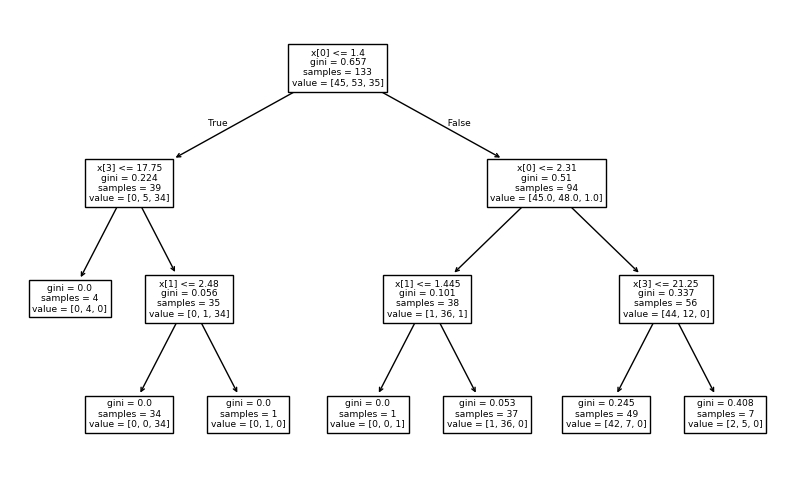

In [ ]:
plt.figure(figsize = (10,6))

### Decision tree of the train data.

plot_tree(model_DT)

The top **node** is the root, and it **branches** out into further nodes based on **decisions**. Each node, then indicates details about the **decisions** being made and the characteristics of the data at that point. In particular,  each node has information regarding the following elements:

* Gini index: It is a measure of impurity (non-homogeneity) and it provides information about the probability of misclassifying a randomly chosen element from the dataset. The greater the value of the Gini Index, the greater the chances of having misclassifications.

* Sample: this Indicates the amount of elements still remained into analysis, and so, the instances not excluded from the previous decision. For example, at the root node, $sample=133$, that correspond to all the elements of the training dataset on which is based this decision three.

* Values: this data, instead, provide information regarding how many elements are left for each category at that precised node.

Each node has a condition related to an x[i] that represents a feature used for splitting the data. Based on my dataset:
* x[0]= Flavanoids;
* x[1]= OD280/OD315 of diluted wines;
* x[2]= Total phenols;
* x[3]= Alcalinity of ash.

Therefore, analyzing some example paths of this decision three, the starting point root node means that If (Flavanoids <= 1.4) is _True_, it proceed to step 2 to its right (the left of the reader). This second step (x[3] <= 17.75) check If Alcalinity of ash <= 17.75 is _True_, proceed to step 3 again to its right.
This leads to a leaf node. **Leaves** are nodes at the very bottom, with gini = 0.0 and a value. These represent the final predictions of the model, where there are residuals of only one grape variety.
This branch predicts wine class 2. (value = [0, 4, 0]). These are the wines with low Flavanoids and low Alcalinity of ash.

On the other hand, for example, if  the second step Alcalinity of ash <= 17.75 is _False_, then it proceed to the third step to the left, checking if x[1]= OD280/OD315 of diluted wines <= 2.48. If it is _True_, it reach a leaf node with prediction of grape variety 3. Instead, If x[1]<= 2.48, the **decision** three reach as well a leaf node but predicting grape variety 2.


Analyzing other paths, for example, starts at the root node: x[0] <= 1.4. If _False_ (Flavanoids > 1.4), proceed to step 2 to its left.
Check x[0] <= 2.31 and If _False_,  proceed to step 3.
Check x[1] <= 1.445. If _False_), proceed to step 4.
This leads to a leaf node. This branch predicts wine class 2. (value = [1, 36, 0]). These are the wines with very high Flavanoids and high OD280/OD315 of diluted wines.
Branch 6:

Starts at the root node: x[0] <= 1.4. If False (Flavanoids > 1.4), proceed to step 2.
Check x[0] <= 2.31. If True (Flavanoids <= 2.31), proceed to step 3.
This branch doesn't consider any other variable and leads to the leaf predicting class 1. These are wines with medium values of Flavanoids.

This side of the three, where the condition in the **root** is _True_, arrives at providing clear predictions, with all the leaves with GINI=0 and always a clear grape variety left.

The other side of the three, where the condition in the **root** is _False_, instead, leads to a definitive prediction just for one out of four cases, predicting class 3.
Actually, this happens because in fitting the model, I fixed the maximum depht of the decision three at value 3 ("model_DT= DecisionTreeClassifier(max_depth=3, random_state=2"). Settling this max_depth=3, the decision three stops at the step 3 and so it will be less precise and not sure about the class prediction.

Increasing max_depth, therefore, will lead to better precision and less prediction errors.

## Gradient Boost model

Next, check the confusion matrix of the Gradient Boosting model.

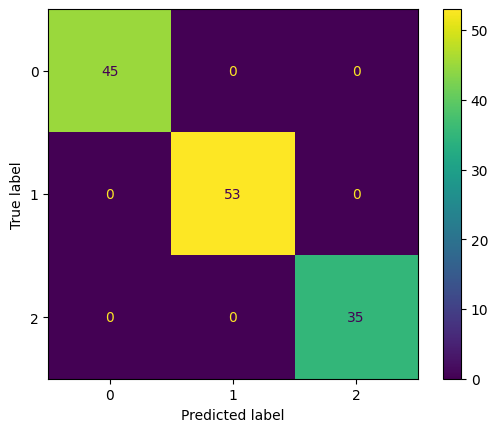

In [ ]:
cm = confusion_matrix(y_train, y_train_model_GB)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

#plot_confusion_matrix(model4, X_train, y_train)

The confusion matrix displays labels 0, 1, and 2 because most machine learning libraries in Python (including scikit-learn) assume that class labels start from 0.

So, while training my model, the scikit-learn library related to the Gradient Boosting model (model_GB), converts the classes labels (1, 2, 3) to (0, 1, 2) for its calculations and representations.
So, even though the confusion matrix can be still understood, it is better to change the labels with the actual ones provided in the dataset.


To avoid confusion, I will adjust the labels displayed in the visualization.

In the meanwhile, let's also change the colour to some more wine-related ones with the colour "PuRd_r".


Text(0, 0.5, 'True Label')

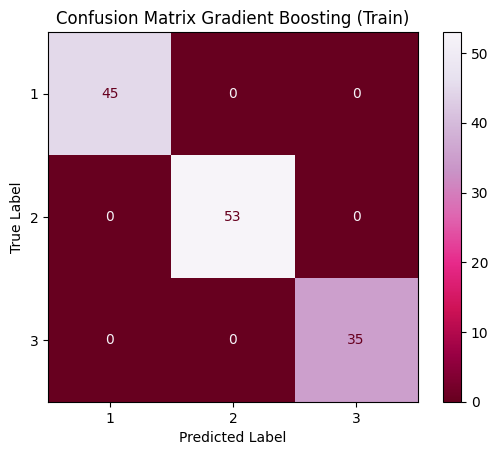

In [ ]:
# confusion matrix training data

cm = confusion_matrix(y_train, y_train_model_GB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot(cmap='PuRd_r')
plt.title('Confusion Matrix Gradient Boosting (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Since the Gradient Boost shows an astonishing performance, with an 100% accuracy, there are no wrongly predicted values in the training dataset

Text(0, 0.5, 'True Label')

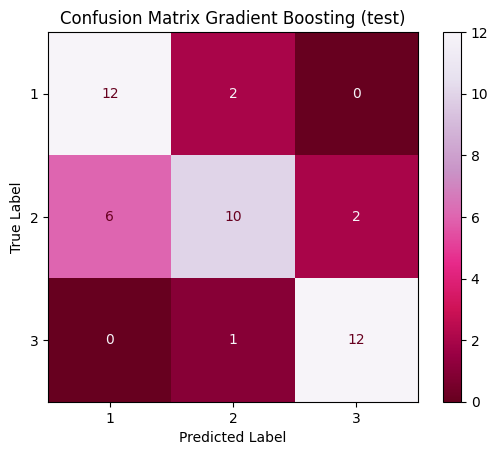

In [ ]:
# Confusion matrix test data

cm_test = confusion_matrix(y_test, y_test_model_GB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[1, 2, 3])
disp.plot(cmap='PuRd_r')
plt.title('Confusion Matrix Gradient Boosting (test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


In the test data, some prediction errors are shown, with the most relevant related to category 1, where 6 data have been incorrectly predicted as category 2.

Other errors are in category 2, where two values have been predicted as category 1 and 2 as category 3.

In the category 3, instead just two mistakes have been made, wrongly predicting for category 2.

Now let's see further details regarding the model with the classification_report:

In [ ]:
### Classification report for the train data (Gradient Boosting)

print(classification_report(y_train, y_train_model_GB))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        35

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



The classification_report provides a comprehensive summary of the performance of the classification model on the test data:
1. **Precision**:
For each class it provides the % of correctly predicted instances out of all the instances predicted as belonging to that class.

2. **Recall**:
For each class, it provides the % of correctly predicted instances out of all the actual instances predicted to belong to that class.

3. **F1-score**:
For each class, it provides a balanced measure of precision and recall, calculated as the harmonic mean of the two.
It's a good overall metric to consider when you want to balance both precision and recall.

4. **Support**:
For each class, it shows the number of actual instances belonging to that class in the test data, providing a good idea of the distribution of the data.

5. **Accuracy**:
It represents the overall proportion of correctly classified instances across all classes.
It's a simple and still useful metric, but it might not be suitable and representative in case of imbalanced classes.

Then the last two indicators are the most useful in understanding the quality and the precisione of the model because they take into account all the predicted classes in analysis.

**Macro Average** calculates the unweighted mean of precision, recall, and F1-score across all classes.
It treats all classes equally, regardless of their support.

**Weighted Average**, instead, calculates the weighted mean of precision, recall, and F1-score across all classes, where the weights are proportional to the support of each class. In this way, the mean takes into account the class distribution in the data.

Coherently with the confusion matrix, the classification report related to the train data shows highest possible score in every indicator.

The amount of data selected for the train dataset are 133 values, corresponding to the $\sim$ 75% of the whole dataset.

In [ ]:
### Classification report for the test data (Gradient Boosting)

print(classification_report(y_test, y_test_model_GB))

              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.77      0.56      0.65        18
           3       0.86      0.92      0.89        13

    accuracy                           0.76        45
   macro avg       0.76      0.78      0.76        45
weighted avg       0.76      0.76      0.75        45



The amount of data selected for the test dataset are 45 values, corresponding to the 25% of the whole dataset.

Accordingly with the confusion matrix, for class 1, it shows the lowest precision since it committed 6 mistakes in the prediction. These mistakes are then spreaded between the other two classes that therefore show better precisions, obtaining a global quality of the model at around 0.76, that even if it is lower than the perfect result obtained with the train data, it is still reasonable and good.


Probably, cutting out some outliars, it is possible to obtain even better results.

## Now I will create some new data entries regarding these 4 choosen variables
In this way, I can test the prediction of the gradient boost model in assessing the grape variety of the new data entries.

I will create some reasonable values, so, first of all, let's assess the range of values of each variables.

In [ ]:
subset[['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols', 'Alcalinity of ash', 'Y']].describe()

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash,Y
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.029270,2.611685,2.295112,19.494944,1.938202
std,0.998859,0.709990,0.625851,3.339564,0.775035
min,0.340000,1.270000,0.980000,10.600000,1.000000
25%,1.205000,1.937500,1.742500,17.200000,1.000000
50%,2.135000,2.780000,2.355000,19.500000,2.000000
75%,2.875000,3.170000,2.800000,21.500000,3.000000
max,5.080000,4.000000,3.880000,30.000000,3.000000


In [ ]:
### Data for three new wine analysis

Xnew = pd.DataFrame([[0.5, 1, 1, 25], [2, 2.5, 2.5, 15], [3.5, 4, 4, 20]], columns = ['Flavanoids', 'OD280/OD315 of diluted wines', 'Total phenols', 'Alcalinity of ash'])
Xnew

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash
0,0.5,1.0,1.0,25
1,2.0,2.5,2.5,15
2,3.5,4.0,4.0,20


With the prediction of the model_GB regarding the grape variety, it will be possible to create the column Y.

In [ ]:
prediction = model_GB.predict(Xnew)
probability = model_GB.predict_proba(Xnew).round(2)
Xnew['Y'] = prediction
Xnew

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash,Y
0,0.5,1.0,1.0,25,3
1,2.0,2.5,2.5,15,2
2,3.5,4.0,4.0,20,1


So,  yes, each new rows shows wine charactericts of a different grape variety:

the model_GB predict that the data entries regarding the hypotetical analysis in wine of Row[0], are of the variety 3 of grape.

The model_GB predict that the data entries regarding the hypotetical analysis in wine of Row[1], are of the variety 2 of grape.

The model_GB predict that the data entries regarding the hypotetical analysis in wine of Row[2], are of the variety 1 of grape.

Let's assess the probability provided by the model:

In [ ]:
 Xnew[['Grape class 1', 'Grape class 2', 'Grape class 3']] = probability
 Xnew

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash,Y,Grape class 1,Grape class 2,Grape class 3
0,0.5,1.0,1.0,25,3,0.00,0.00,1.0
1,2.0,2.5,2.5,15,2,0.00,1.00,0.0
2,3.5,4.0,4.0,20,1,0.99,0.01,0.0


The model shows incredibly high probability for each row, so this confirm the each new wine has characteristics that clearly distinguish it from other variety.

Now, let's plot these new data entries in the previous pairplots and let's see if it is possible to assess the same reasonings also from the graph.

<Axes: xlabel='Alcalinity of ash', ylabel='Total phenols'>

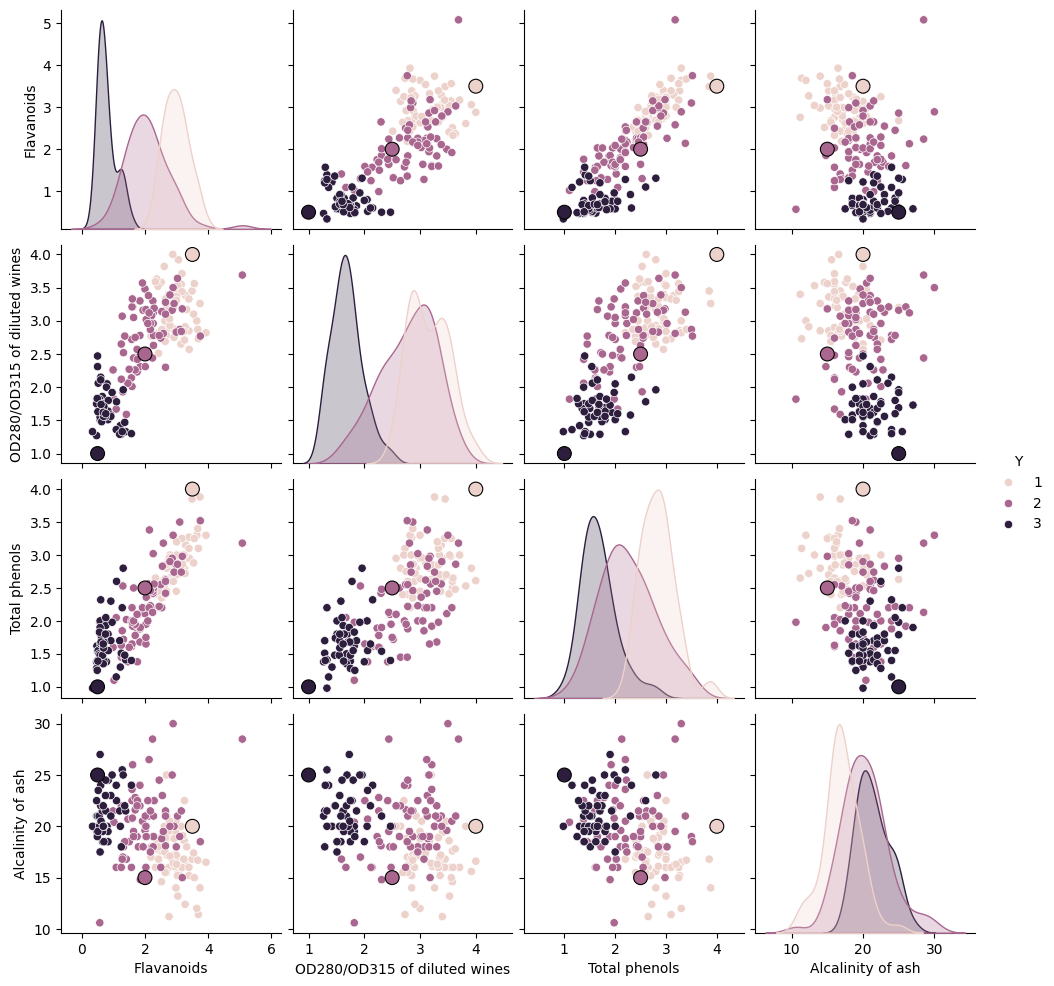

In [ ]:
# Create the first pairplot
sns.pairplot(subset, hue='Y')

# Overlay the second pairplot's data points

# x= Flavanoids
sns.scatterplot(x='Flavanoids', y='OD280/OD315 of diluted wines', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[4])
sns.scatterplot(x='Flavanoids', y='Total phenols', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[8])
sns.scatterplot(x='Flavanoids', y='Alcalinity of ash', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[12])


# x= OD280/OD315 of diluted wines
sns.scatterplot(x='OD280/OD315 of diluted wines', y='Flavanoids', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[1])
sns.scatterplot(x='OD280/OD315 of diluted wines', y='Total phenols', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[9])
sns.scatterplot(x='OD280/OD315 of diluted wines', y='Alcalinity of ash', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[13])

# x= Total phenols
sns.scatterplot(x='Total phenols', y='Flavanoids', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[2])
sns.scatterplot(x='Total phenols', y='OD280/OD315 of diluted wines', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[6])
sns.scatterplot(x='Total phenols', y='Alcalinity of ash', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[14])

# x= Alcalinity of ash
sns.scatterplot(x='Alcalinity of ash', y='Flavanoids', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[3])
sns.scatterplot(x='Alcalinity of ash', y='Total phenols', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[7])
sns.scatterplot(x='Alcalinity of ash', y='OD280/OD315 of diluted wines', data=Xnew, hue='Y', marker='o', s=100, edgecolors='black', facecolors='none', legend=False, ax=plt.gcf().axes[11])



From the graph here above, it is possible to assess the different grape variety, since these new data are located, almost every time, in a clear zone of the graph carachterized by a big number of points of the same category.

So the new data appear to be suitable for assessing the grape variety and each one of the three new rows have a different grape variety.

Furthermore, since each new point is located rather in the center of each cluster, the probability generated by the model is very high.

Now let's assess the probability that the model provides regarding points with randomized characteristics, that can lead to confused points on the edges of the clusters, making them less recognizable for the model:

Actually, the new data won't be completely randomized, but they will be randomized just within the range of the observations of the respective variable, provided in the original dataset.

In [ ]:
# Get the range of each variable in the 'subset' DataFrame
variable_ranges = {
    'Flavanoids': (subset['Flavanoids'].min(), subset['Flavanoids'].max()),
    'OD280/OD315 of diluted wines': (subset['OD280/OD315 of diluted wines'].min(), subset['OD280/OD315 of diluted wines'].max()),
    'Total phenols': (subset['Total phenols'].min(), subset['Total phenols'].max()),
    'Alcalinity of ash': (subset['Alcalinity of ash'].min(), subset['Alcalinity of ash'].max())
}

# Generate random data for three new rows
num_new_rows = 3
new_data = {}
for variable, (min_val, max_val) in variable_ranges.items():
    new_data[variable] = np.random.uniform(min_val, max_val, size=num_new_rows)

# Create a new DataFrame from the generated data
Xnew_random = pd.DataFrame(new_data)

Xnew_random

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash
0,1.123821,3.332304,2.441527,27.914750
1,3.402738,3.354649,1.818794,12.964921
2,2.807142,1.401191,3.511872,17.002687


In [ ]:
prediction2 = model_GB.predict(Xnew_random)
probability2 = model_GB.predict_proba(Xnew_random).round(2)
# Xnew_random['Y'] = prediction2

# Get the maximum probability for each prediction
max_prob = np.max(probability2, axis=1)

# Assign null if max probability is less than 0.7
Xnew_random['Y'] = np.where(max_prob >= 0.7, prediction2, np.nan)

Xnew_random[['Grape class 1', 'Grape class 2', 'Grape class 3']] = probability2
Xnew_random

,Flavanoids,OD280/OD315 of diluted wines,Total phenols,Alcalinity of ash,Y,Grape class 1,Grape class 2,Grape class 3
0,1.123821,3.332304,2.441527,27.914750,2.0,0.15,0.85,0.00
1,3.402738,3.354649,1.818794,12.964921,1.0,1.00,0.00,0.00
2,2.807142,1.401191,3.511872,17.002687,NaN,0.68,0.25,0.06


With random generated values, actually the probabilities are considerably lower. A part for the second row, where the wine has characteristics that make the prediction of its grape variety with a probability of 100% for class 1, the other two wines (row[0] and row[2]) show rather low probabilities.

This means that their grape variety is not so easy recognizable and maybe they are in overlapping zone not so easy to be recognized.
In this case the model provides the value of the dependant variable 'Y' based on the variety with the highest probability.


To prevent the model to assign a class when the characterics are preceived as confused and don't outline a precise grape variety, I can set a threshold.
Here above, for example, I set a threshold at 0.7 and if the probability is less than 0.7 than the model won't predict any grape variety.

This strategy is not always useful or applicable but it can avoid possible wrong prediction related to predictions made with low probability.

In this way, it is possible to clearly identify and separate the confused rows with low probabilities that had generated "null" values and maybe further refine the analysis with other models or other variables or other strategies.